In [1]:
# %% imports
%matplotlib inline
import tensorflow as tf
from keras.layers import Input, Dense, Convolution2D, Deconvolution2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import regularizers
from keras import backend as K
import keras
import numpy as np
import matplotlib.pyplot as plt
import math
from skimage import feature

Using TensorFlow backend.


In [2]:
# input_img = Input(shape=(84, 84, 1))

# c1 = Convolution2D(32, 8, 8, activation='relu', border_mode='same')(input_img)
# x = MaxPooling2D((4, 4), border_mode='same')(c1)
# x = Convolution2D(16, 4, 4, activation='relu', border_mode='same')(x)
# x = MaxPooling2D((2, 2), border_mode='same')(x)
# x = Convolution2D(8, 3, 3, activation='relu', border_mode='same')(x)
# x = MaxPooling2D((2, 2), border_mode='same')(x)

# x = keras.layers.core.Flatten()(x)
# encoded = Dense(6*6*4, activation='relu')(x)
# x = keras.layers.core.Reshape((6, 6, 4))(encoded)

# x = Convolution2D(16, 3, 3, activation='relu', border_mode='same')(x)
# x = UpSampling2D((2, 2))(x)
# x = Convolution2D(16, 4, 4, activation='relu', border_mode='same')(x)
# x = UpSampling2D((2, 2))(x)
# x = Convolution2D(32, 4, 4, activation='relu')(x)
# x = UpSampling2D((4, 4))(x)
# x = Convolution2D(1, 3, 3, activation='relu', border_mode='same')(x)

# conv_ae = Model(input_img, x)
# conv_ae.compile(optimizer='adam', loss='mse')
# conv_ae.output_shape
# conv_ae.summary()

In [3]:
input_img = Input(shape=(84, 84, 1))

x = Convolution2D(16, 8, 8, activation='relu', border_mode='same')(input_img)
x = MaxPooling2D((4, 4), border_mode='same')(x)
x = Convolution2D(12, 4, 4, activation='relu', border_mode='same')(x)
x = MaxPooling2D((2, 2), border_mode='same')(x)
x = Convolution2D(8, 3, 3, activation='relu', border_mode='same')(x)
x = MaxPooling2D((2, 2), border_mode='same')(x)

x = keras.layers.core.Flatten()(x)
encoded = Dense(6*6*3, activation='relu')(x)


encoder = Model(input_img, encoded)
encoder.compile(optimizer='adam', loss='mse')

input_code = Input(shape=(6*6*3, 1))


# encoded = Dense(6*6*2, activation='relu')(x)
x = keras.layers.core.Reshape((6, 6, 3))(input_code)

x = Convolution2D(8, 3, 3, activation='relu', border_mode='same')(x)
x = UpSampling2D((2, 2))(x)
x = Convolution2D(12, 4, 4, activation='relu', border_mode='same')(x)
x = UpSampling2D((2, 2))(x)
x = Convolution2D(16, 4, 4, activation='relu')(x)
x = UpSampling2D((4, 4))(x)
recon_image = Convolution2D(1, 3, 3, activation='relu', border_mode='same')(x)

decoder = Model(input_code, recon_image)
decoder.compile(optimizer='adam', loss='mse')

input_total = Input(shape=(84, 84, 1))

code = encoder(input_total)
output_total= decoder(code)

conv_ae = Model(input_total, output_total)
conv_ae.compile(optimizer='adam', loss='mse')
conv_ae.output_shape
conv_ae.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_3 (InputLayer)             (None, 84, 84, 1)     0                                            
____________________________________________________________________________________________________
model_1 (Model)                  (None, 108)           36208       input_3[0][0]                    
____________________________________________________________________________________________________
model_2 (Model)                  (None, 84, 84, 1)     5005        model_1[1][0]                    
Total params: 41213
____________________________________________________________________________________________________


In [636]:
input_state = Input(shape=(6*6*3, 1))
output_state = keras.layers.recurrent.LSTM(6*6*3, activation='tanh')(input_state)
# output_state = Dense(108, activation='relu')(x)

physics = Model(input_state, output_state)
physics.compile(optimizer='adam', loss='mse')
physics.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_9 (InputLayer)             (None, 108, 1)        0                                            
____________________________________________________________________________________________________
lstm_6 (LSTM)                    (None, 108)           47520       input_9[0][0]                    
Total params: 47520
____________________________________________________________________________________________________


In [99]:
input_img = Input(shape=(84, 84, 1))
# encoded_input = Input(shape=(6, 6, 8))

x = Convolution2D(16, 8, 8, activation='relu', border_mode='same')(input_img)
x = MaxPooling2D((4, 4), border_mode='same')(x)
x = Convolution2D(12, 4, 4, activation='relu', border_mode='same')(x)
x = MaxPooling2D((2, 2), border_mode='same')(x)
x = Convolution2D(8, 3, 3, activation='relu', border_mode='same')(x)
encoded = MaxPooling2D((2, 2), border_mode='same')(x)

# x = keras.layers.core.Flatten()(x)
# encoded = Dense(6*6*2, activation='relu')(x)
# encoded = Dense(6*6*1, activation='relu')(x)
# x = keras.layers.core.Reshape((6, 6, 1))(encoded)

x = Convolution2D(8, 3, 3, activation='relu', border_mode='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Convolution2D(12, 4, 4, activation='relu', border_mode='same')(x)
x = UpSampling2D((2, 2))(x)
x = Convolution2D(16, 4, 4, activation='relu')(x)
x = UpSampling2D((4, 4))(x)
recon_img = Convolution2D(1, 3, 3, activation='relu', border_mode='same')(x)

conv_ae = Model(input_img, recon_img)
encoder = Model(input_img, encoded)

encoded_input = Input(shape=(6, 6, 8))
# decoder = Model(encoded_input, recon_img)

conv_ae.compile(optimizer='adam', loss='mse')
conv_ae.output_shape
conv_ae.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_5 (InputLayer)             (None, 84, 84, 1)     0                                            
____________________________________________________________________________________________________
convolution2d_22 (Convolution2D) (None, 84, 84, 16)    1040        input_5[0][0]                    
____________________________________________________________________________________________________
maxpooling2d_10 (MaxPooling2D)   (None, 21, 21, 16)    0           convolution2d_22[0][0]           
____________________________________________________________________________________________________
convolution2d_23 (Convolution2D) (None, 21, 21, 12)    3084        maxpooling2d_10[0][0]            
___________________________________________________________________________________________

In [4]:
def read_and_decode_single_example(filename):
    # first construct a queue containing a list of filenames.
    # this lets a user split up there dataset in multiple files to keep
    # size down
    filename_queue = tf.train.string_input_producer([filename],
                                                    num_epochs=None)
    # Unlike the TFRecordWriter, the TFRecordReader is symbolic
    reader = tf.TFRecordReader()
    # One can read a single serialized example from a filename
    # serialized_example is a Tensor of type string.
    _, serialized_example = reader.read(filename_queue)
    # The serialized example is converted back to actual values.
    # One needs to describe the format of the objects to be returned
    features = tf.parse_single_example(
        serialized_example,
        features={
            # We know the length of both fields. If not the
            # tf.VarLenFeature could be used
            'image_processed': tf.FixedLenFeature([], tf.string)     
        })
    # now return the converted data
    image = tf.decode_raw(features['image_processed'], tf.uint8)
    image = tf.cast(image, tf.float32) * (1. / 255)
    return image

In [484]:
DATA_SIZE = 30000
# TRAIN_SIZE = 30000
# VALID_SIZE = 5000

def get_all_images(game, train):
    if train is True:
        file_train = "new_images/" + game + "-" + "train" + ".tfrecords"
    else:
        file_train = "new_images/" + game + "-" + "valid" + ".tfrecords"
        
        
    # returns symbolic label and image
    image = read_and_decode_single_example(file_train)

    sess = tf.Session()

    # Required. See below for explanation
    init = tf.initialize_all_variables()
    sess.run(init)
    tf.train.start_queue_runners(sess=sess)

    # grab examples back.

    ims = []
#     n = TRAIN_SIZE if train else VALID_SIZE
    n = DATA_SIZE
    for i in range(n):
        im = sess.run([image])
        ims.append(im[0])
    
    return ims

GAME = 'Asteroids'
# GAME = 'Pong'
# GAME = 'DemonAttack'
# GAME = 'SpaceInvaders'

X = get_all_images(GAME, train=True)
# x_valid = get_all_images(GAME, train=False)

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [485]:
X = np.array(X)
X[:,:] /= np.max(X, axis=0) + 1e-5
X = np.reshape(X, (X.shape[0], 84, 84, 1))
# remove the top lines (score in asteroids)
X[:,0:8,:,:] = 0 
X.shape

(30000, 84, 84, 1)

In [512]:
VALID_FRAC = 0.1
n_x = X.shape[0]
idx_shuf = np.array(range(n_x))
np.random.shuffle(idx_shuf)

idx_valid = idx_shuf[:int(n_x*VALID_FRAC)]
idx_train = idx_shuf[int(n_x*VALID_FRAC):]

x_valid = X[idx_valid,:,:,:]
x_train = X[idx_train,:,:,:]

In [8]:
# x_valid = np.array(x_valid)
# x_valid[:,:] /= np.max(x_valid, axis=0) + 1e-5
# x_valid = np.reshape(x_valid, (VALID_SIZE, 84, 84, 1))
# # remove the top lines (score in asteroids)
# x_valid[:,0:10,:,:] = 0 
# x_valid.shape

In [514]:
conv_ae.fit(x_train, x_train, nb_epoch=15, batch_size=32, shuffle=True, validation_data=(x_valid, x_valid))

Train on 27000 samples, validate on 3000 samples
Epoch 1/15
27000/27000 [==============================] - 354s - loss: 0.0081 - val_loss: 0.0080

KeyboardInterrupt: 

8126
(10, 108)


/home/ira/code/envs/flexi/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


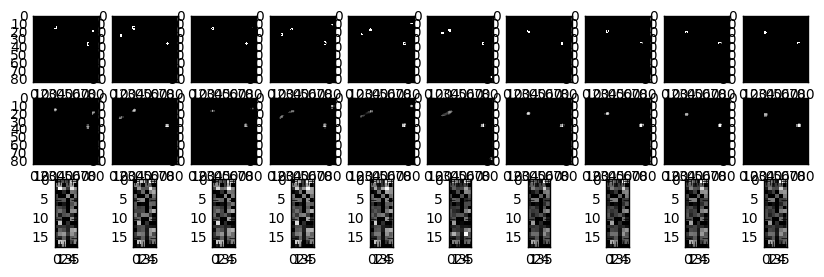

In [513]:
# Plot example reconstructions
n_examples = 10
# test_im = images_batch.eval(session=sess).reshape(150, 28, 28, 1)
shift = np.random.randint(X.shape[0]-10)
# shift = 0
print(shift)
test = X[shift:shift+10,:,:,:]
recon = conv_ae.predict(test)
code = encoder.predict(test)
print(code.shape)
code = code.reshape((code.shape[0], 6 * 3, 6, 1))

fig, axs = plt.subplots(3, n_examples, figsize=(10, 3))
for example_i in range(n_examples):
    axs[0][example_i].imshow(test[1*example_i, :,:,0], cmap='gray', interpolation='none',
                            vmin=0, vmax=0.8)
#     axs[1][example_i].imshow(recon[example_i,:,:], cmap='gray')
    axs[1][example_i].imshow(recon[1*example_i, :,:,0], cmap='gray', interpolation='none',
                            vmin=0, vmax=0.8)
    axs[2][example_i].imshow(code[1*example_i, :,:,0], cmap='gray', interpolation='none')
    
fig.show()
plt.draw()


In [500]:
ix = 0

In [510]:
ix += 1
im1 = test[ix,:,:,0]
im2 = recon[ix,:,:,0]
im3 = code[ix,:,:,0]
fig, axs = plt.subplots(1, 3)
axs[0].imshow(im1, cmap='gray', interpolation='none', vmin=0, vmax=1)
axs[1].imshow(im2, cmap='gray', interpolation='none', vmin=0, vmax=1)
axs[2].imshow(im3, cmap='gray', interpolation='none')

# plt.imshow(im, cmap='gray', interpolation='none', vmin=0, vmax=1)

IndexError: index 10 is out of bounds for axis 0 with size 10

(array([ 376.,  216.,  222.,  126.,   78.,   42.,   13.,    5.,    1.,    1.]),
 array([ 0.        ,  0.75899062,  1.51798124,  2.27697186,  3.03596249,
         3.79495311,  4.55394373,  5.31293435,  6.07192497,  6.83091559,
         7.58990622]),
 <a list of 10 Patch objects>)

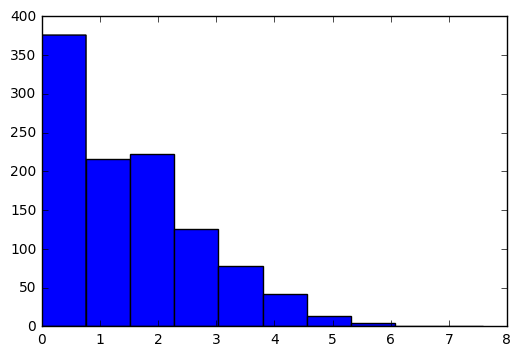

In [470]:
# np.histogram(code)
plt.hist(code.flatten())

In [419]:
code = 1.5*np.random.randn((5, 108, 1)).astype('float32')
# code = np.reshape(code, (10, 108, 1))
# code[0,:,0] += 0.08 * np.random.random((108)).astype('float32')
im = decoder.predict(code)
print(im.shape)
plt.imshow(im[0,:,:,0], cmap='gray', interpolation='none', vmin=0, vmax=1)

TypeError: an integer is required

In [91]:
conv_ae = keras.models.load_model('weights/conv_ae_asteroids_large.hdf5')

In [692]:
conv_ae.save('models/conv_ae_asteroids_dense.hdf5')
encoder.save('models/encoder_asteroids_dense.hdf5')
decoder.save('models/decoder_asteroids_dense.hdf5')
physics.save('models/physics_asteroids')

In [24]:
i1 = test[1, :,:,0]
i2 = test[2, :,:,0]

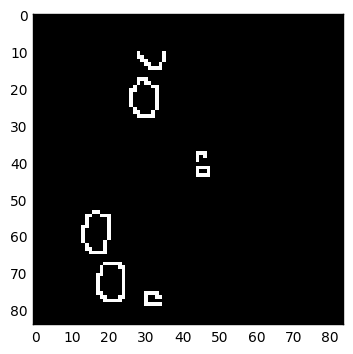

In [25]:
plt.imshow(np.logical_or(i1,i2), cmap='gray', interpolation='none', vmin=0, vmax=1)

In [93]:
enc = conv_ae.layers[-7]

In [774]:
batch_size = 128
for i in range(5000):
#     print(i,)
    shift = np.random.randint(X.shape[0]-batch_size-1)
    train = X[shift:shift+batch_size+1,:,:,:]
    state1 = encoder.predict(train)
    state2 = np.copy(state1).reshape((batch_size+1, 108, 1))
    
    print(physics.train_on_batch(state2[:-1,:]/10, state1[1:,:]/10))

    

0.00715667
0.00406244
0.00632953
0.00258685
0.00339001
0.0116692
0.00443787
0.00260441
0.00541083
0.00360912
0.00539852
0.0044921


KeyboardInterrupt: 

In [775]:
batch_size = 20
shift = np.random.randint(X.shape[0]-batch_size-1)
train = X[shift:shift+batch_size+1,:,:,:]
state1 = encoder.predict(train)
state2 = np.copy(state1).reshape((batch_size+1, 108, 1))

pred_state = physics.predict(state2[:-1,:])*10

print(pred_state.shape)

true_recon = decoder.predict(state2[:,:])
pred_recon = decoder.predict(pred_state.reshape((20, 108, 1)))

ix = 0 

(20, 108)


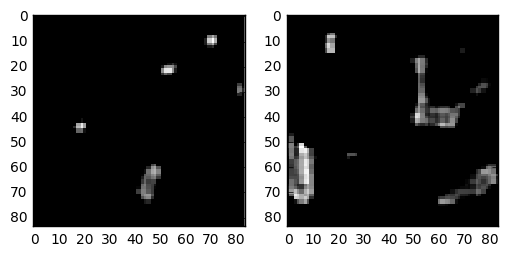

In [782]:
ix += 1
im1 = true_recon[ix+1,:,:,0]
im2 = pred_recon[ix,:,:,0]
# im3 = code[ix,:,:,0]
fig, axs = plt.subplots(1, 2)
axs[0].imshow(im1, cmap='gray', interpolation='none')
axs[1].imshow(im2, cmap='gray', interpolation='none')
# axs[2].imshow(im3, cmap='gray', interpolation='none')


In [712]:
x=0

In [713]:
np.max(pred_state)

9.9999294

(108, 1)
(108,)


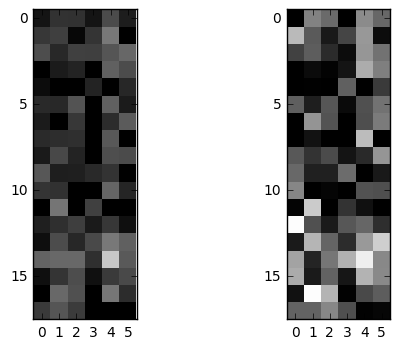

In [765]:
ix += 1
im1 = state2[ix,:]
im2 = pred_state[ix,:]
print(im1.shape)
print(im2.shape)
# im3 = code[ix,:,:,0]
fig, axs = plt.subplots(1, 2)
axs[0].imshow(im1.reshape(18, 6), cmap='gray', interpolation='none', vmin=0, vmax=8)
axs[1].imshow(im2.reshape(18, 6), cmap='gray', interpolation='none', vmin=0, vmax=8)
# axs[2].imshow(im3, cmap='gray', interpolation='none')
